In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import random
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris_data = pd.read_csv('iris.data')
iris_data.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

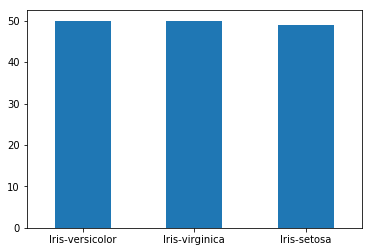

In [3]:
target = iris_data['class'].value_counts(sort = True)
print(target)
target.plot(kind = 'bar')
plt.xticks(label = target.index,rotation = 0)
# zeta = target.reset_index()
# sns.barplot(x = 'index', y = 'class', data = zeta)

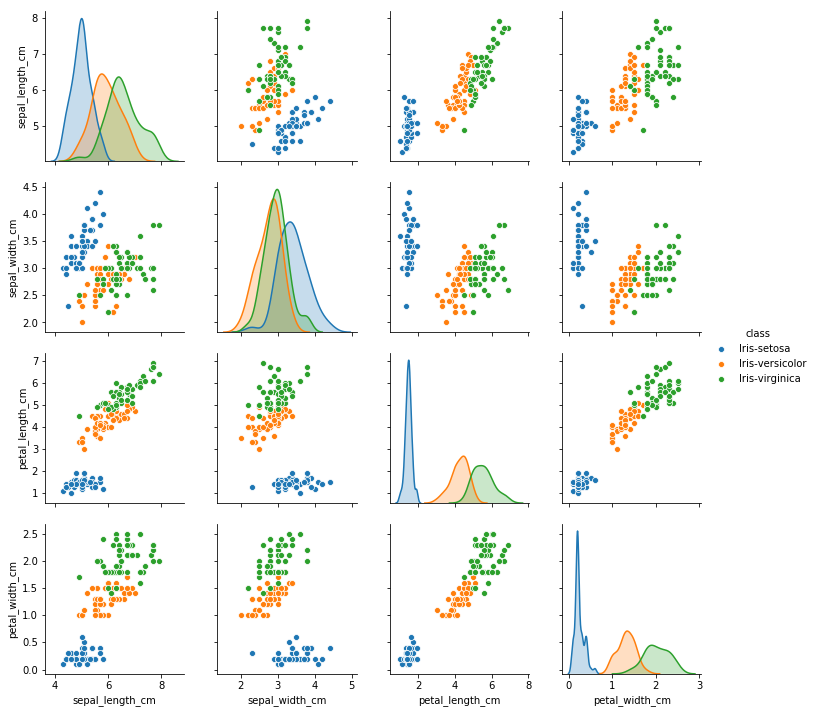

In [4]:
sns.pairplot(data = iris_data, hue = 'class')

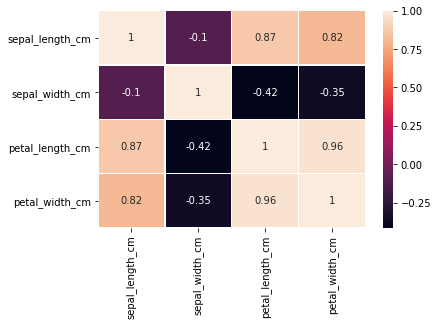

In [5]:
sns.heatmap(iris_data.corr(), annot=True, linewidths= 0.2)

In [6]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


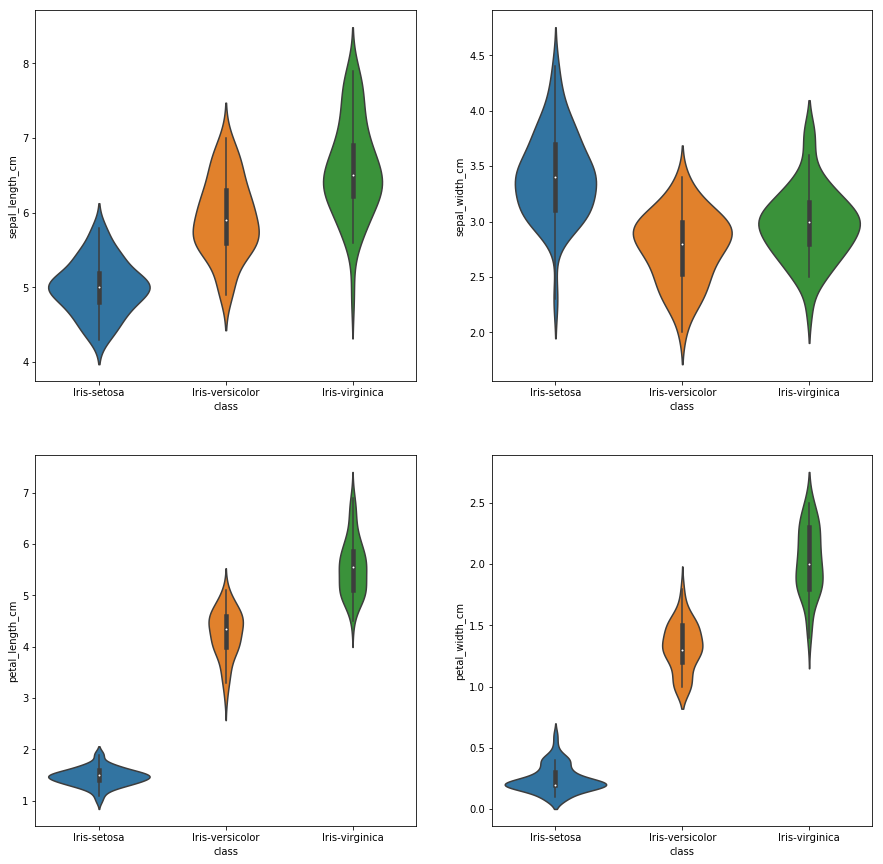

In [7]:
fig = plt.figure(figsize = (15,15))
for i in range(4):
    plt.subplot(2,2,i + 1)
    sns.violinplot(x = 'class',y=iris_data.columns[i], data = iris_data, split = True)

In [9]:
data = iris_data.copy()
data['class'] = data['class'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

### All features ###

In [10]:
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(data.iloc[:,:-1].values, data.iloc[:,-1].values,random_state = 1)

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3],
                  'warm_start': [True, False]}

rfc = RandomForestClassifier()
grif = GridSearchCV(rfc, param_grid = parameter_grid, cv = 2)
grif.fit(x_a_train,y_a_train)

print(grif.best_score_)
print(grif.best_params_)

0.954954954954955
{'criterion': 'gini', 'max_features': 2, 'n_estimators': 10, 'warm_start': False}


d:\language\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Choose the top 3 features ###

([<matplotlib.axis.XTick at 0x12f76e18c18>,
 <a list of 4 Text xticklabel objects>)

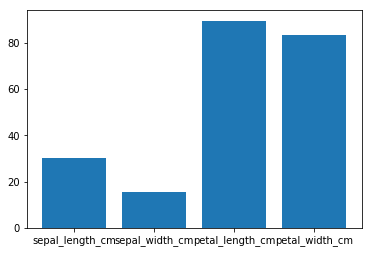

In [12]:
skb = SelectKBest(f_classif, k = 3)
x_data = skb.fit_transform(data.iloc[:,:-1], data.iloc[:,-1])

value = -np.log10(skb.pvalues_)
plt.bar(range(len(value)), value)
plt.xticks(range(len(value)), data.columns[:len(value)])

0.9472943722943723


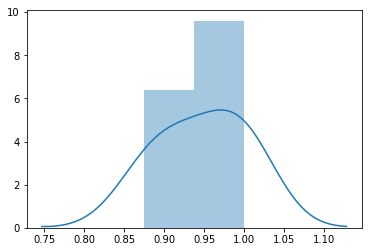

In [14]:
random.seed(1)
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,:-1].values, data.iloc[:,-1].values)

dtr = DecisionTreeClassifier(max_depth=3)
score = cross_val_score(dtr, x_train, y_train, cv = 5)
sns.distplot(score)
print(score.mean())

In [15]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3]}

dtr = DecisionTreeClassifier()
grid_search = GridSearchCV(dtr,param_grid=parameter_grid, cv= 5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

# score = cross_val_score(dtr, x_train, y_train, cv = 5)
# sns.distplot(score)
# print(score.mean())

{'max_depth': 2, 'max_features': 3}
0.972972972972973


d:\language\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
random_forest_classifier = RandomForestClassifier()
parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3],
                  'warm_start': [True, False]}

rfc = RandomForestClassifier()
grif = GridSearchCV(rfc, param_grid=parameter_grid, cv = 2)
grif.fit(x_train,y_train)

print(grif.best_score_)
print(grif.best_params_)

0.963963963963964
{'criterion': 'gini', 'max_features': 2, 'n_estimators': 5, 'warm_start': False}


d:\language\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test, y_test)

d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9210526315789473

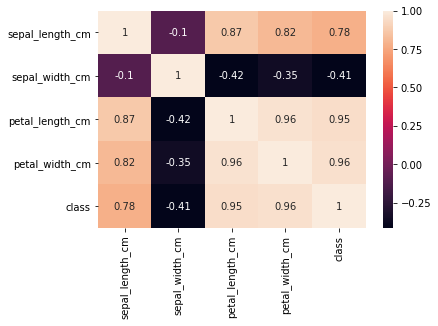

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test, y_test)